In [ ]:
import numpy as np
class Logistic_Regression:
    def __init__(self,Learning_Rate,no_of_iterations):
        self.Learning_Rate=Learning_Rate
        self.no_of_iterations=no_of_iterations



    def fit(self,X,Y):
        self.rows,self.cols=X.shape   #rows=no of data points & cols=no of features
        self.w=np.zeros(self.cols)
        self.b=0
        self.X=X
        self.Y=Y

        for i in range(self.no_of_iterations):
            self.update_weight()


    def update_weight(self):
        z=self.X.dot(self.w)+self.b
        Y_hat=1/(1+np.exp(-z))


        dw=np.dot(self.X.T,(Y_hat-self.Y))/self.rows
        db=np.sum(Y_hat-self.Y)/self.rows

        self.w=self.w-self.Learning_Rate*dw
        self.b=self.b-self.Learning_Rate*db


    def predict(self,X):
        Y_predict=1/(1+np.exp(-(X.dot(self.w)+self.b)))
        Y_predict=np.where(Y_predict>0.5,1,0)
        return Y_predict



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
diab_df=pd.read_csv('/content/diabetes.csv')
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diab_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
diab_df.shape

(768, 9)

In [ ]:
diab_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
X=diab_df.iloc[:,:-1].values
Y=diab_df.iloc[:,-1].values
Scaler=StandardScaler()
X=Scaler.fit_transform(X)


In [ ]:
X.shape

(768, 8)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [ ]:
Log_R=Logistic_Regression(0.01,100000)
Log_R.fit(X_train,Y_train)
print(Log_R.w,Log_R.b)

[ 0.21735072  1.08976009 -0.26865986  0.05019653 -0.20919421  0.80846291
  0.22996063  0.43586766] -0.8612749302016327


In [ ]:
Y_pred=Log_R.predict(X_test)
print(Y_pred)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [ ]:
print(Y_pred.shape)

(154,)


In [ ]:
test_accuracy_score=accuracy_score(Y_test,Y_pred)

In [ ]:
print(test_accuracy_score)

0.7532467532467533


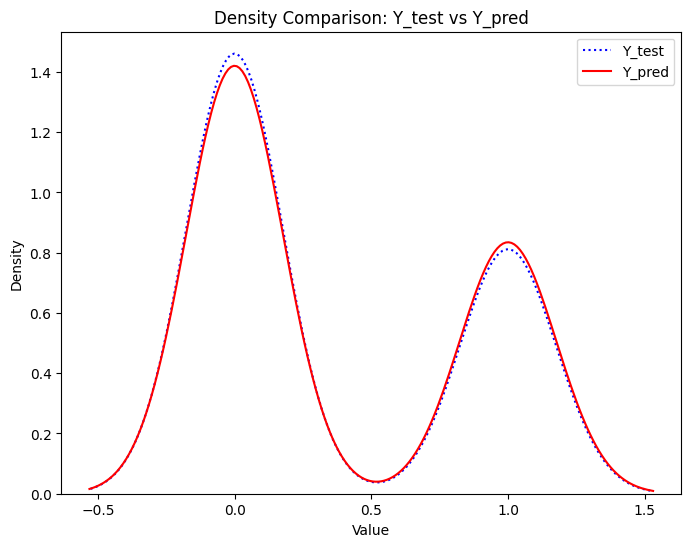

In [ ]:
import seaborn as sns

# Plot the density distributions
plt.figure(figsize=(8, 6))
sns.kdeplot(Y_test, color='blue', label='Y_test',linestyle='dotted')
sns.kdeplot(Y_pred, color='red', label='Y_pred')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Comparison: Y_test vs Y_pred')
plt.legend()
plt.show()

